In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

### Load dataset

In [2]:
test_df = pd.read_csv("./test.csv")
train_df = pd.read_csv("./train.csv")

In [3]:
train_df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [4]:
test_df.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


In [5]:
train_df.set_index('PassengerId', inplace=True)
test_df.set_index('PassengerId', inplace=True)

In [6]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test_df.head(1)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


In [8]:
train_index = train_df.index
test_index = test_df.index

## Data preproecessing

In [9]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [10]:
test_df.isnull().sum() / len(test_df) 

Pclass     0.00
Name       0.00
Sex        0.00
Age        0.21
SibSp      0.00
Parch      0.00
Ticket     0.00
Fare       0.00
Cabin      0.78
Embarked   0.00
dtype: float64

In [11]:
train_df.isnull().sum() / len(train_df) * 100

Survived    0.00
Pclass      0.00
Name        0.00
Sex         0.00
Age        19.87
SibSp       0.00
Parch       0.00
Ticket      0.00
Fare        0.00
Cabin      77.10
Embarked    0.22
dtype: float64

#### Decion 1 - Drop cabin

In [12]:
#Title 추출 
#data-> string 으로 바꿔주는 str method
#정규 표현식을 적용하게 해주는 extract method
#Title 을 initial column에 저장
train_df['Initial']= train_df.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations
    
test_df['Initial']= test_df.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

In [13]:
pd.crosstab(train_df['Initial'], train_df['Sex']).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [14]:
#남자가 쓰는 이름과 여자가 쓰는 이름을 구별
#replace를 이용하여 원하는 값으로 치환
train_df['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

test_df['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

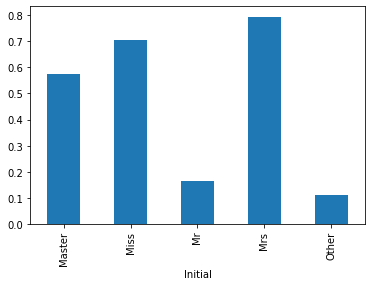

In [15]:
train_df.groupby('Initial')['Survived'].mean().plot.bar()

In [16]:
train_df.groupby('Initial').mean()
#여성과 관계가 높은 Miss, Mrs 가 생존률이 높은 것을 볼 수 있다.

,Survived,Pclass,Age,SibSp,Parch,Fare
Initial,,,,,,
Master,0.57,2.62,4.57,2.30,1.38,34.70
Miss,0.70,2.28,21.86,0.70,0.54,43.94
Mr,0.16,2.38,32.74,0.29,0.15,24.94
Mrs,0.80,1.98,35.98,0.69,0.82,45.42
Other,0.11,1.67,45.89,0.11,0.11,19.10


### Fill Null in Age

In [17]:
train_df.loc[(train_df.Age.isnull())&(train_df.Initial=='Mr'),'Age'] = 33
train_df.loc[(train_df.Age.isnull())&(train_df.Initial=='Mrs'),'Age'] = 36
train_df.loc[(train_df.Age.isnull())&(train_df.Initial=='Master'),'Age'] = 5
train_df.loc[(train_df.Age.isnull())&(train_df.Initial=='Miss'),'Age'] = 22
train_df.loc[(train_df.Age.isnull())&(train_df.Initial=='Other'),'Age'] = 46

test_df.loc[(test_df.Age.isnull())&(test_df.Initial=='Mr'),'Age'] = 33
test_df.loc[(test_df.Age.isnull())&(test_df.Initial=='Mrs'),'Age'] = 36
test_df.loc[(test_df.Age.isnull())&(test_df.Initial=='Master'),'Age'] = 5
test_df.loc[(test_df.Age.isnull())&(test_df.Initial=='Miss'),'Age'] = 22
test_df.loc[(test_df.Age.isnull())&(test_df.Initial=='Other'),'Age'] = 46

### Fill Null in Embarked

In [18]:
print('Embarked has ', sum(train_df['Embarked'].isnull()), ' Null values')

Embarked has  2  Null values


In [19]:
train_df['Embarked'].fillna('S', inplace=True)
train_df['Embarked'].isnull().any()

False

### Change Initial, Embarked and Sex (string to numerical)

In [20]:
train_df['Initial'] = train_df['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})
test_df['Initial'] = test_df['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})

In [21]:
train_df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [22]:
train_df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [23]:
train_df['Embarked'] = train_df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
test_df['Embarked'] = test_df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [24]:
train_df['Sex'] = train_df['Sex'].map({'female': 0, 'male': 1})
test_df['Sex'] = test_df['Sex'].map({'female': 0, 'male': 1})

### correlation between features 

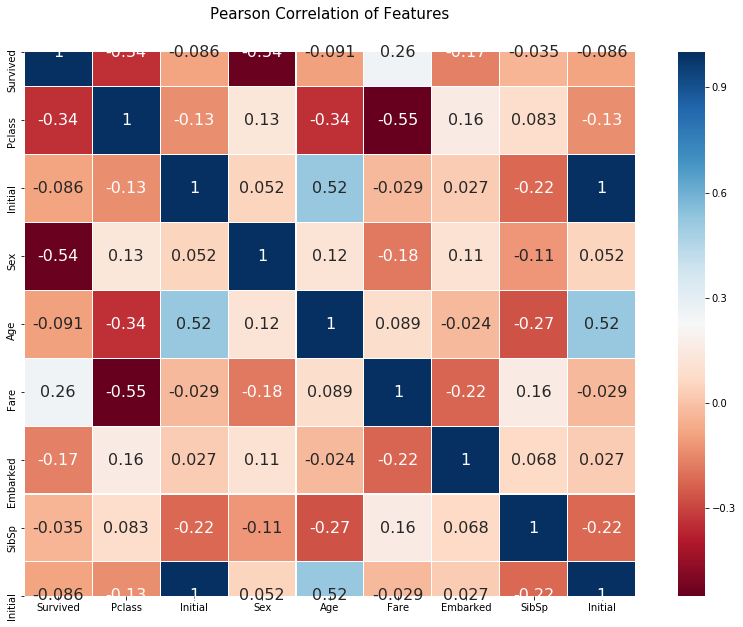

In [25]:
heatmap_data = train_df[[ 'Survived', 'Pclass','Initial', 'Sex', 'Age', 'Fare', 'Embarked', 'SibSp', 'Initial', ]] 

colormap = plt.cm.RdBu
plt.figure(figsize=(15, 10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

del heatmap_data

### One-hot encoding on Initial and Embarked

모델의 성능을 높이기 위한것  
pandas의 get_dummies를 사용해서 5개의 카테고리(Master, Miss, Mr, Mrs, Other)를 새로운 5개의 colum으로 만들어 준다.

In [26]:
train_df = pd.get_dummies(train_df, columns=['Initial'], prefix='Initial')
test_df = pd.get_dummies(test_df, columns=['Initial'], prefix='Initial')

In [27]:
train_df = pd.get_dummies(train_df, columns=['Embarked'], prefix='Embarked')
test_df = pd.get_dummies(test_df, columns=['Embarked'], prefix='Embarked')

In [28]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
PassengerId,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.00,1,0,A/5 21171,7.25,NaN,0,0,1,0,0,0,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.00,1,0,PC 17599,71.28,C85,0,0,0,1,0,1,0,0
3,1,3,"Heikkinen, Miss. Laina",0,26.00,0,0,STON/O2. 3101282,7.92,NaN,0,1,0,0,0,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.00,1,0,113803,53.10,C123,0,0,0,1,0,0,0,1
5,0,3,"Allen, Mr. William Henry",1,35.00,0,0,373450,8.05,NaN,0,0,1,0,0,0,0,1


### Drop columns

In [29]:
train_df.drop(['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
test_df.drop(['Name',  'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [30]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
PassengerId,,,,,,,,,,,,,
1,0,3,1,22.00,7.25,0,0,1,0,0,0,0,1
2,1,1,0,38.00,71.28,0,0,0,1,0,1,0,0
3,1,3,0,26.00,7.92,0,1,0,0,0,0,0,1
4,1,1,0,35.00,53.10,0,0,0,1,0,0,0,1
5,0,3,1,35.00,8.05,0,0,1,0,0,0,0,1


In [31]:
test_df.head()

,Pclass,Sex,Age,Fare,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
PassengerId,,,,,,,,,,,,
892,3,1,34.50,7.83,0,0,1,0,0,0,1,0
893,3,0,47.00,7.00,0,0,0,1,0,0,0,1
894,2,1,62.00,9.69,0,0,1,0,0,0,1,0
895,3,1,27.00,8.66,0,0,1,0,0,0,0,1
896,3,0,22.00,12.29,0,0,0,1,0,0,0,1


## Build Model and predict using the trained model

In [32]:
#importing all the required ML packages
from sklearn.ensemble import RandomForestClassifier # 유명한 randomforestclassfier
from sklearn import metrics # 모델의 평가를 위해서 사용
from sklearn.model_selection import train_test_split # traning set을 쉽게 나눠주는 함수

In [33]:
#학습에 쓰일 data와 target label(Survived)를 분리한다.
X_train = train_df.drop('Survived', axis=1).values
target_label = train_df['Survived'].values
X_test = test_df.values

In [34]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.3, random_state=2018)

In [35]:
#Model generation and prediction
model = RandomForestClassifier()
model.fit(X_tr, y_tr)
prediction = model.predict(X_vld)

C:\Users\DataScience\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [36]:
#print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0], 100 * metrics.accuracy_score(prediction, y_vld)))

### Feature importance

현재 만든 model이 어떤 feature에 영향을 많이 받았는지 확인 할 수 있다.

In [37]:
from pandas import Series

feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=test_df.columns)

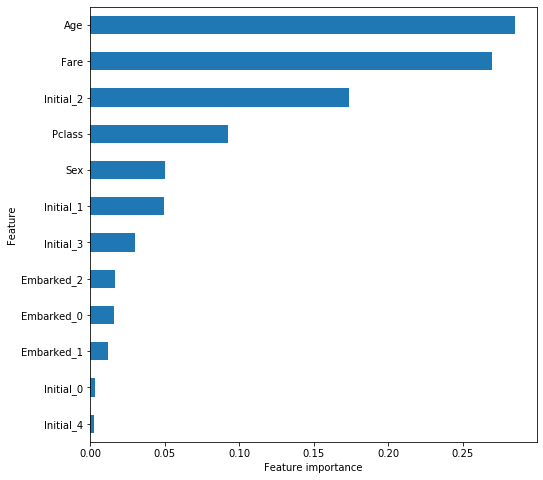

In [38]:
plt.figure(figsize=(8, 8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

In [39]:
submission = pd.read_csv('./gender_submission.csv')

In [40]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [41]:
df_submssion =pd.DataFrame(submission, columns=["PassengerId","Survived"])
df_submssion

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [42]:
df_submssion.to_csv("my_first_submission.csv",index=False)